In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# from keras.preprocessing.image import ImageDataGenerator, load_img
%matplotlib inline

In [2]:
df = pd.read_csv('fer2013.csv')

In [3]:
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
df.shape

(35887, 3)

In [5]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [6]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [7]:
df.groupby('emotion')['Usage'].value_counts()

emotion  Usage      
0        Training       3995
         PrivateTest     491
         PublicTest      467
1        Training        436
         PublicTest       56
         PrivateTest      55
2        Training       4097
         PrivateTest     528
         PublicTest      496
3        Training       7215
         PublicTest      895
         PrivateTest     879
4        Training       4830
         PublicTest      653
         PrivateTest     594
5        Training       3171
         PrivateTest     416
         PublicTest      415
6        Training       4965
         PrivateTest     626
         PublicTest      607
Name: Usage, dtype: int64

In [8]:
x_train,y_train,x_val,y_val,x_test,y_test = [],[],[],[],[],[]

In [9]:
for index, row in df.iterrows():
    pixels_val = row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
            x_train.append(np.array(pixels_val, 'float32'))
            y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            x_val.append(np.array(pixels_val, 'float32'))
            y_val.append(row['emotion'])
        elif 'PrivateTest' in row['Usage']:
            x_test.append(np.array(pixels_val, 'float32'))
            y_test.append(row['emotion'])
    except:
        print('Error occured at index {} and row {}'.format(index,row))
    

In [10]:
x_train[0:5]

[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32),
 array([151., 150., 147., ..., 193., 183., 184.], dtype=float32),
 array([231., 212., 156., ...,  88., 110., 152.], dtype=float32),
 array([ 24.,  32.,  36., ..., 142., 143., 142.], dtype=float32),
 array([ 4.,  0.,  0., ..., 30., 29., 30.], dtype=float32)]

In [11]:
y_train[0:5]

[0, 0, 2, 4, 6]

In [12]:
print(x_val[0:3])
print(y_val[0:3])
print(x_test[0:3])
print(y_test[0:3])

[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32), array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32)]
[0, 1, 4]
[array([170., 118., 101., ..., 159., 133., 131.], dtype=float32), array([ 7.,  5.,  8., ..., 72., 57., 52.], dtype=float32), array([232., 240., 241., ...,   4.,   4.,   9.], dtype=float32)]
[0, 5, 6]


In [13]:
type(x_train)

list

In [14]:
type(y_train)

list

In [15]:
x_train = np.array(x_train,'float32')

In [16]:
x_train.shape

(28709, 2304)

In [17]:
y_train = np.array(y_train)
x_val = np.array(x_val,'float32')
y_val = np.array(y_val)
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test)

In [18]:
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3589, 2304)
(3589,)
(3589, 2304)
(3589,)


In [19]:
img_width = 48
img_height = 48
channels = 1

In [20]:
image1, image2, image3 = x_train[0,:], x_train[1,:], x_train[2,:]
image1 = image1.reshape(img_width,img_height)
image2 = image2.reshape(img_width,img_height)
image3 = image3.reshape(img_width,img_height)

## anger = 0, disgust = 1, fear = 2, happy = 3, sad = 4, surprise = 5, neutral = 6

Categories: [0 0 2]


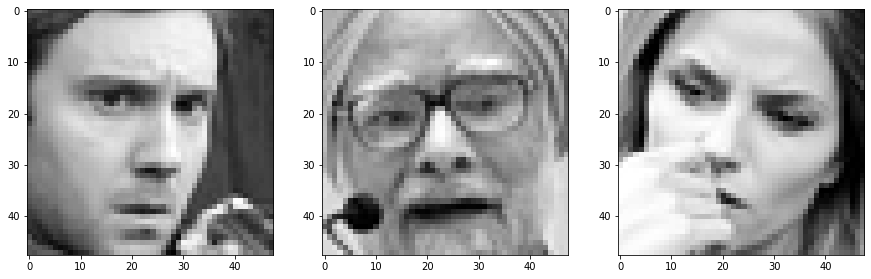

In [21]:
fig, ax = plt.subplots(1,3, figsize = (15,15))

ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')
ax[2].imshow(image3, cmap='gray')
print('Categories: {}'.format(y_train[:3]))

In [22]:
#  Normalizing data
x_train = x_train/255.
x_val = x_val/255.
x_test = x_test/255.

print(x_train[0,:])

[0.27450982 0.3137255  0.32156864 ... 0.41568628 0.42745098 0.32156864]


In [23]:
x_train.shape[0]

28709

In [24]:
# Reshape pixel arrays to 48 by 48 pixel images with 1 colour channel
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, channels)
x_val = x_val.reshape(x_val.shape[0], img_width, img_height, channels)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, channels)

## Define a CNN model

In [25]:
import tensorflow as tf


In [26]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding = 'same',
                        input_shape=(img_width,img_height,channels)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(256,(3,3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(512,(3,3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(512,(3,3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['acc'])

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

In [30]:
callbacks = myCallback()

In [31]:
model.fit(x_train,y_train,
         batch_size = 128,
         epochs = 30,
         validation_data = (x_val,y_val),
         callbacks=[callbacks])

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 371s 13ms/sample - loss: 1.9132 - acc: 0.2092 - val_loss: 1.8584 - val_acc: 0.2494
Epoch 2/30
28709/28709 [==============================] - 370s 13ms/sample - loss: 1.7609 - acc: 0.2873 - val_loss: 1.8340 - val_acc: 0.2661
Epoch 3/30
28709/28709 [==============================] - 362s 13ms/sample - loss: 1.6373 - acc: 0.3643 - val_loss: 1.6111 - val_acc: 0.3639
Epoch 4/30
28709/28709 [==============================] - 356s 12ms/sample - loss: 1.5158 - acc: 0.4180 - val_loss: 1.4938 - val_acc: 0.4322
Epoch 5/30
28709/28709 [==============================] - 372s 13ms/sample - loss: 1.4285 - acc: 0.4496 - val_loss: 1.4198 - val_acc: 0.4372
Epoch 6/30
28709/28709 [==============================] - 377s 13ms/sample - loss: 1.3621 - acc: 0.4767 - val_loss: 1.4381 - val_acc: 0.4556
Epoch 7/30
28709/28709 [==============================] - 379s 13ms/sample - loss: 1.3131 - acc: 0.4962 -

In [151]:
model.save('emotion_ditect.h5')

In [156]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=0)

In [157]:
print('test loss:', test_loss)
print('test accuracy:', test_acc)

test loss: 1.347516767192797
test accuracy: 0.6308164
